In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Notebook is ready")

Notebook is ready


# Curve Fitting using Least Squares
## Data Set A

In [2]:
x_A = np.array([2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
y_A = np.array([5, 3.4, 2, 1.6, 1.2, 0.8, 0.6, 0.4, 0.3, 0.3])

print("Data Set A loaded")

Data Set A loaded


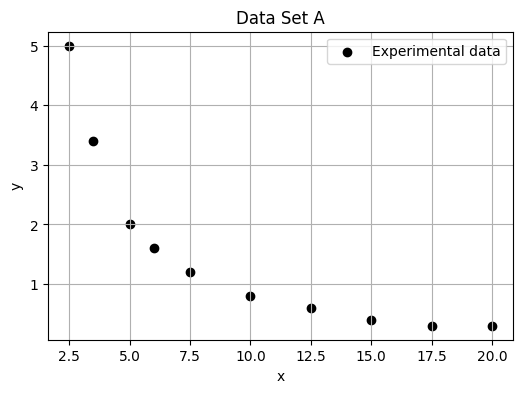

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Set A")
plt.grid(True)
plt.legend()
plt.show()

## Linear Least Squares Model
Model:  y = a + b x

In [4]:
# Linear least squares
coeff_linear = np.polyfit(x_A, y_A, 1)

b = coeff_linear[0]
a = coeff_linear[1]

print(f"Linear model: y = {a:.4f} + {b:.4f}x")

Linear model: y = 3.6344 + -0.2085x


In [5]:
# Predicted values
y_hat_linear = a + b * x_A

In [6]:
# Residuals
residuals = y_A - y_hat_linear

# Sum of Squared Errors (SSE)
SSE_linear = np.sum(residuals**2)

# Coefficient of determination (R^2)
y_mean = np.mean(y_A)
R2_linear = 1 - np.sum((y_A - y_hat_linear)**2) / np.sum((y_A - y_mean)**2)

print(f"SSE (Linear) = {SSE_linear:.6f}")
print(f"R^2 (Linear) = {R2_linear:.6f}")

SSE (Linear) = 7.081050
R^2 (Linear) = 0.671626


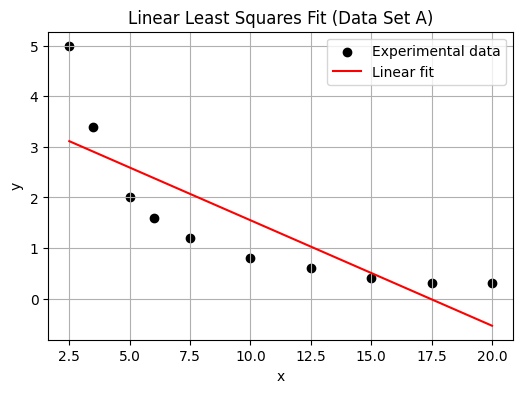

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.plot(x_A, y_hat_linear, color="red", label="Linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Least Squares Fit (Data Set A)")
plt.grid(True)
plt.legend()
plt.show()

## Parabolic Least Squares Model
Model:  y = a x² + b x + c

In [8]:
# Parabolic least squares (degree = 2)
coeff_parabolic = np.polyfit(x_A, y_A, 2)

a_p = coeff_parabolic[0]
b_p = coeff_parabolic[1]
c_p = coeff_parabolic[2]

print(f"Parabolic model: y = {a_p:.6f}x^2 + {b_p:.6f}x + {c_p:.6f}")

Parabolic model: y = 0.026360x^2 + -0.789313x + 5.925588


In [9]:
y_hat_parabolic = a_p * x_A**2 + b_p * x_A + c_p

In [10]:
# Residuals
residuals_p = y_A - y_hat_parabolic

# SSE
SSE_parabolic = np.sum(residuals_p**2)

# R^2
R2_parabolic = 1 - np.sum((y_A - y_hat_parabolic)**2) / np.sum((y_A - np.mean(y_A))**2)

print(f"SSE (Parabolic) = {SSE_parabolic:.6f}")
print(f"R^2 (Parabolic) = {R2_parabolic:.6f}")

SSE (Parabolic) = 2.069739
R^2 (Parabolic) = 0.904019


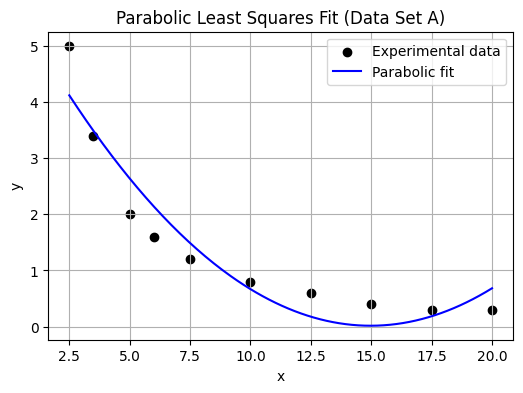

In [11]:
# Smooth x for nicer curve
x_smooth = np.linspace(min(x_A), max(x_A), 200)
y_smooth_parabolic = a_p * x_smooth**2 + b_p * x_smooth + c_p

plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.plot(x_smooth, y_smooth_parabolic, color="blue", label="Parabolic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parabolic Least Squares Fit (Data Set A)")
plt.grid(True)
plt.legend()
plt.show()

## Power Model (Least Squares)
Model:  y = a x^b
Linearized:  ln(y) = ln(a) + b ln(x)

In [12]:
ln_x = np.log(x_A)
ln_y = np.log(y_A)

coeff_power = np.polyfit(ln_x, ln_y, 1)

b_pow = coeff_power[0]
ln_a_pow = coeff_power[1]
a_pow = np.exp(ln_a_pow)

print(f"Power model: y = {a_pow:.6f} * x^{b_pow:.6f}")

Power model: y = 19.510339 * x^-1.410378


In [13]:
y_hat_power = a_pow * (x_A ** b_pow)

SSE_power = np.sum((y_A - y_hat_power)**2)
R2_power = 1 - np.sum((y_A - y_hat_power)**2) / np.sum((y_A - np.mean(y_A))**2)

print(f"SSE (Power) = {SSE_power:.6f}")
print(f"R^2 (Power) = {R2_power:.6f}")

SSE (Power) = 0.145379
R^2 (Power) = 0.993258


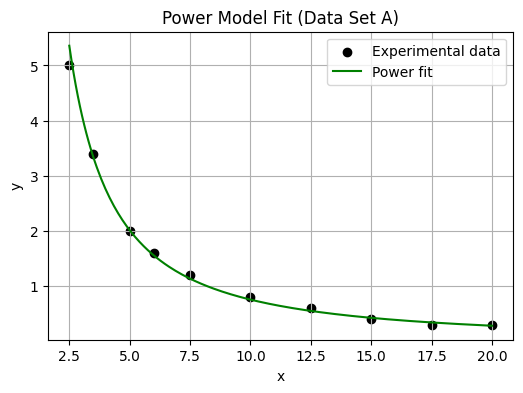

In [14]:
x_smooth = np.linspace(min(x_A), max(x_A), 200)
y_smooth_power = a_pow * (x_smooth ** b_pow)

plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.plot(x_smooth, y_smooth_power, color="green", label="Power fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Power Model Fit (Data Set A)")
plt.grid(True)
plt.legend()
plt.show()

## Exponential Model (Least Squares)
Model:  y = a e^{b x}
Linearized:  ln(y) = ln(a) + b x

In [15]:
ln_y = np.log(y_A)

coeff_exp = np.polyfit(x_A, ln_y, 1)

b_exp = coeff_exp[0]
ln_a_exp = coeff_exp[1]
a_exp = np.exp(ln_a_exp)

print(f"Exponential model: y = {a_exp:.6f} * e^({b_exp:.6f} x)")

Exponential model: y = 4.889619 * e^(-0.158298 x)


In [16]:
y_hat_exp = a_exp * np.exp(b_exp * x_A)

SSE_exp = np.sum((y_A - y_hat_exp)**2)
R2_exp = 1 - np.sum((y_A - y_hat_exp)**2) / np.sum((y_A - np.mean(y_A))**2)

print(f"SSE (Exponential) = {SSE_exp:.6f}")
print(f"R^2 (Exponential) = {R2_exp:.6f}")

SSE (Exponential) = 3.543028
R^2 (Exponential) = 0.835697


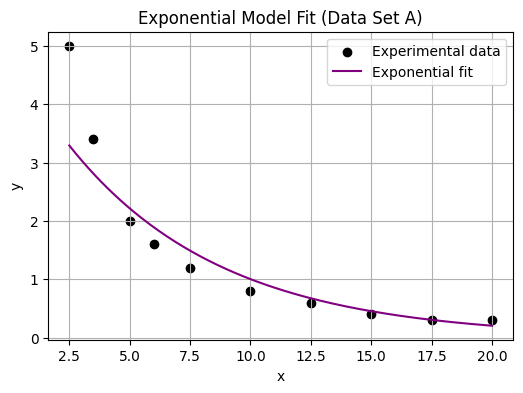

In [17]:
x_smooth = np.linspace(min(x_A), max(x_A), 200)
y_smooth_exp = a_exp * np.exp(b_exp * x_smooth)

plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.plot(x_smooth, y_smooth_exp, color="purple", label="Exponential fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exponential Model Fit (Data Set A)")
plt.grid(True)
plt.legend()
plt.show()

## Logarithmic Model (Least Squares)
Model:  y = a + b ln(x)

In [18]:
ln_x = np.log(x_A)

coeff_log = np.polyfit(ln_x, y_A, 1)

b_log = coeff_log[0]
a_log = coeff_log[1]

print(f"Logarithmic model: y = {a_log:.6f} + {b_log:.6f} ln(x)")

Logarithmic model: y = 5.903002 + -2.070122 ln(x)


In [19]:
y_hat_log = a_log + b_log * ln_x

SSE_log = np.sum((y_A - y_hat_log)**2)
R2_log = 1 - np.sum((y_A - y_hat_log)**2) / np.sum((y_A - np.mean(y_A))**2)

print(f"SSE (Logarithmic) = {SSE_log:.6f}")
print(f"R^2 (Logarithmic) = {R2_log:.6f}")

SSE (Logarithmic) = 2.549069
R^2 (Logarithmic) = 0.881791


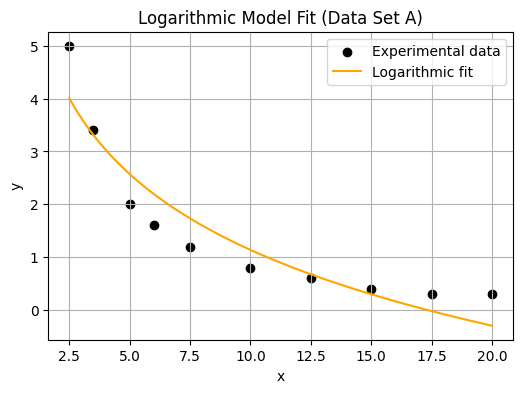

In [20]:
x_smooth = np.linspace(min(x_A), max(x_A), 200)
y_smooth_log = a_log + b_log * np.log(x_smooth)

plt.figure(figsize=(6, 4))
plt.scatter(x_A, y_A, color="black", label="Experimental data")
plt.plot(x_smooth, y_smooth_log, color="orange", label="Logarithmic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logarithmic Model Fit (Data Set A)")
plt.grid(True)
plt.legend()
plt.show()

## Comparison of Models for Data Set A


In [21]:
import pandas as pd

results_A = pd.DataFrame({
    "Model": [
        "Linear",
        "Parabolic",
        "Power",
        "Exponential",
        "Logarithmic"
    ],
    "SSE": [
        SSE_linear,
        SSE_parabolic,
        SSE_power,
        SSE_exp,
        SSE_log
    ],
    "R^2": [
        R2_linear,
        R2_parabolic,
        R2_power,
        R2_exp,
        R2_log
    ]
})

results_A

,Model,SSE,R^2
0,Linear,7.081050,0.671626
1,Parabolic,2.069739,0.904019
2,Power,0.145379,0.993258
3,Exponential,3.543028,0.835697
4,Logarithmic,2.549069,0.881791


### Conclusion (Data Set A)

Based on the comparison of all five models, the quality of approximation was evaluated using the Sum of Squared Errors (SSE) and the coefficient of determination (R²).

The linear model shows the largest error and the lowest R² value, indicating that a straight line is not sufficient to describe the nonlinear behavior of the data.

The parabolic, power, exponential, and logarithmic models provide a significantly better fit, with higher R² values and lower SSE. Among them, the model with the highest R² and the smallest SSE can be considered the most suitable for Data Set A.

Thus, nonlinear regression models are more appropriate for describing the given experimental data.


# Data Set B

In [22]:
x_B = np.array([10, 15, 22.5, 33.7, 50.6, 75.9])
y_B = np.array([0.3, 0.675, 1.519, 3.417, 7.639, 11.3])

print("Data Set B loaded")

Data Set B loaded


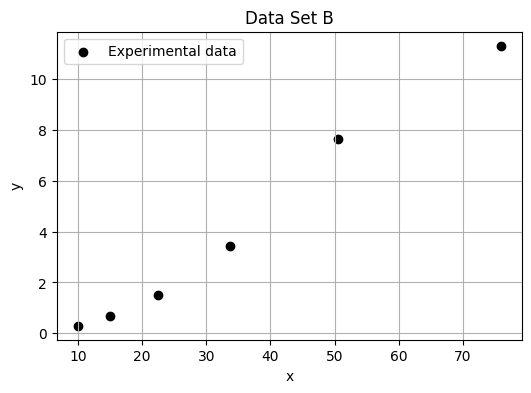

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Set B")
plt.grid(True)
plt.legend()
plt.show()

## Linear Least Squares Model (Data Set B)
Model:  y = a + b x

In [24]:
coeff_linear_B = np.polyfit(x_B, y_B, 1)

b_B = coeff_linear_B[0]
a_B = coeff_linear_B[1]

print(f"Linear model (B): y = {a_B:.4f} + {b_B:.4f}x")

Linear model (B): y = -1.9637 + 0.1764x


In [25]:
y_hat_linear_B = a_B + b_B * x_B

In [26]:
# Residuals
residuals_B = y_B - y_hat_linear_B

# SSE
SSE_linear_B = np.sum(residuals_B**2)

# R^2
y_mean_B = np.mean(y_B)
R2_linear_B = 1 - np.sum((y_B - y_hat_linear_B)**2) / np.sum((y_B - y_mean_B)**2)

print(f"SSE (Linear, B) = {SSE_linear_B:.6f}")
print(f"R^2 (Linear, B) = {R2_linear_B:.6f}")

SSE (Linear, B) = 1.278085
R^2 (Linear, B) = 0.986912


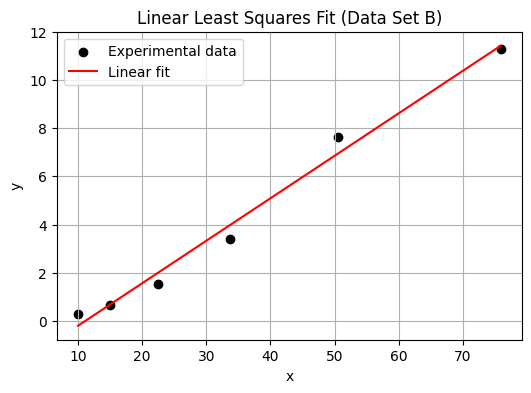

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.plot(x_B, y_hat_linear_B, color="red", label="Linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Least Squares Fit (Data Set B)")
plt.grid(True)
plt.legend()
plt.show()

## Parabolic Least Squares Model (Data Set B)
Model:  y = a x² + b x + c

In [28]:
# Parabolic least squares for Data Set B (degree = 2)
coeff_parabolic_B = np.polyfit(x_B, y_B, 2)

a2_B = coeff_parabolic_B[0]
b2_B = coeff_parabolic_B[1]
c2_B = coeff_parabolic_B[2]

print(
    f"Parabolic model (B): "
    f"y = {a2_B:.6f}x^2 + {b2_B:.6f}x + {c2_B:.6f}"
)

Parabolic model (B): y = 0.000176x^2 + 0.161329x + -1.744872


In [29]:
y_hat_parabolic_B = a2_B * x_B**2 + b2_B * x_B + c2_B

In [30]:
# Residuals
residuals_parabolic_B = y_B - y_hat_parabolic_B

# SSE
SSE_parabolic_B = np.sum(residuals_parabolic_B**2)

# R^2
R2_parabolic_B = (
        1
        - np.sum((y_B - y_hat_parabolic_B)**2)
        / np.sum((y_B - np.mean(y_B))**2)
)

print(f"SSE (Parabolic, B) = {SSE_parabolic_B:.6f}")
print(f"R^2 (Parabolic, B) = {R2_parabolic_B:.6f}")

SSE (Parabolic, B) = 1.244186
R^2 (Parabolic, B) = 0.987259


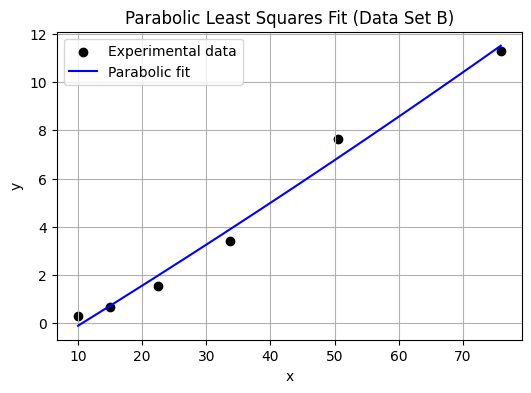

In [31]:
x_smooth_B = np.linspace(min(x_B), max(x_B), 200)
y_smooth_parabolic_B = a2_B * x_smooth_B**2 + b2_B * x_smooth_B + c2_B

plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.plot(x_smooth_B, y_smooth_parabolic_B, color="blue", label="Parabolic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parabolic Least Squares Fit (Data Set B)")
plt.grid(True)
plt.legend()
plt.show()

## Power Model (Least Squares) — Data Set B
Model:  y = a x^b
Linearized:  ln(y) = ln(a) + b ln(x)

In [32]:
ln_x_B = np.log(x_B)
ln_y_B = np.log(y_B)

coeff_power_B = np.polyfit(ln_x_B, ln_y_B, 1)

b_pow_B = coeff_power_B[0]
ln_a_pow_B = coeff_power_B[1]
a_pow_B = np.exp(ln_a_pow_B)

print(f"Power model (B): y = {a_pow_B:.6f} * x^{b_pow_B:.6f}")

Power model (B): y = 0.004606 * x^1.849228


In [33]:
y_hat_power_B = a_pow_B * (x_B ** b_pow_B)

SSE_power_B = np.sum((y_B - y_hat_power_B)**2)

R2_power_B = (
        1
        - np.sum((y_B - y_hat_power_B)**2)
        / np.sum((y_B - np.mean(y_B))**2)
)

print(f"SSE (Power, B) = {SSE_power_B:.6f}")
print(f"R^2 (Power, B) = {R2_power_B:.6f}")

SSE (Power, B) = 7.675582
R^2 (Power, B) = 0.921399


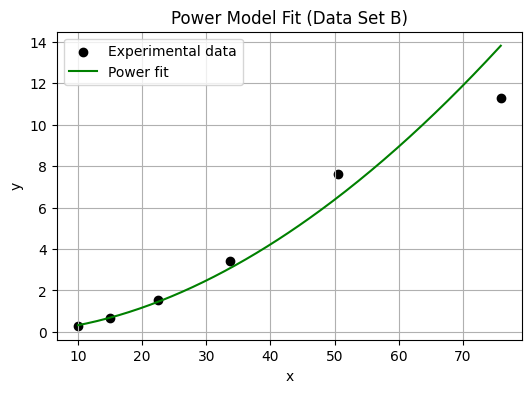

In [34]:
x_smooth_B = np.linspace(min(x_B), max(x_B), 200)
y_smooth_power_B = a_pow_B * (x_smooth_B ** b_pow_B)

plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.plot(x_smooth_B, y_smooth_power_B, color="green", label="Power fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Power Model Fit (Data Set B)")
plt.grid(True)
plt.legend()
plt.show()

## Exponential Model (Least Squares) — Data Set B
Model:  y = a e^{b x}
Linearized:  ln(y) = ln(a) + b x

In [35]:
ln_y_B = np.log(y_B)

coeff_exp_B = np.polyfit(x_B, ln_y_B, 1)

b_exp_B = coeff_exp_B[0]
ln_a_exp_B = coeff_exp_B[1]
a_exp_B = np.exp(ln_a_exp_B)

print(f"Exponential model (B): y = {a_exp_B:.6f} * e^({b_exp_B:.6f} x)")

Exponential model (B): y = 0.340149 * e^(0.052856 x)


In [36]:
y_hat_exp_B = a_exp_B * np.exp(b_exp_B * x_B)

SSE_exp_B = np.sum((y_B - y_hat_exp_B)**2)

R2_exp_B = (
        1
        - np.sum((y_B - y_hat_exp_B)**2)
        / np.sum((y_B - np.mean(y_B))**2)
)

print(f"SSE (Exponential, B) = {SSE_exp_B:.6f}")
print(f"R^2 (Exponential, B) = {R2_exp_B:.6f}")

SSE (Exponential, B) = 65.626080
R^2 (Exponential, B) = 0.327965


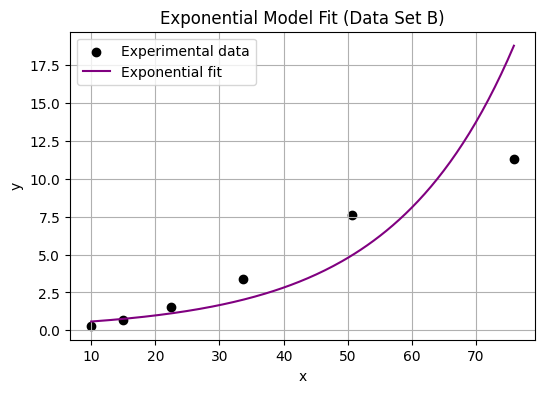

In [37]:
x_smooth_B = np.linspace(min(x_B), max(x_B), 200)
y_smooth_exp_B = a_exp_B * np.exp(b_exp_B * x_smooth_B)

plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.plot(x_smooth_B, y_smooth_exp_B, color="purple", label="Exponential fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exponential Model Fit (Data Set B)")
plt.grid(True)
plt.legend()
plt.show()

## Logarithmic Model (Least Squares) — Data Set B
Model:  y = a + b ln(x)

In [ ]:
ln_x_B = np.log(x_B)

coeff_log_B = np.polyfit(ln_x_B, y_B, 1)

b_log_B = coeff_log_B[0]
a_log_B = coeff_log_B[1]

print(f"Logarithmic model (B): y = {a_log_B:.6f} + {b_log_B:.6f} ln(x)")

In [ ]:
y_hat_log_B = a_log_B + b_log_B * ln_x_B

SSE_log_B = np.sum((y_B - y_hat_log_B)**2)

R2_log_B = (
        1
        - np.sum((y_B - y_hat_log_B)**2)
        / np.sum((y_B - np.mean(y_B))**2)
)

print(f"SSE (Logarithmic, B) = {SSE_log_B:.6f}")
print(f"R^2 (Logarithmic, B) = {R2_log_B:.6f}")

In [ ]:
x_smooth_B = np.linspace(min(x_B), max(x_B), 200)
y_smooth_log_B = a_log_B + b_log_B * np.log(x_smooth_B)

plt.figure(figsize=(6, 4))
plt.scatter(x_B, y_B, color="black", label="Experimental data")
plt.plot(x_smooth_B, y_smooth_log_B, color="orange", label="Logarithmic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logarithmic Model Fit (Data Set B)")
plt.grid(True)
plt.legend()
plt.show()

## Comparison of Models for Data Set B

In [ ]:
results_B = pd.DataFrame({
    "Model": [
        "Linear",
        "Parabolic",
        "Power",
        "Exponential",
        "Logarithmic"
    ],
    "SSE": [
        SSE_linear_B,
        SSE_parabolic_B,
        SSE_power_B,
        SSE_exp_B,
        SSE_log_B
    ],
    "R^2": [
        R2_linear_B,
        R2_parabolic_B,
        R2_power_B,
        R2_exp_B,
        R2_log_B
    ]
})

results_B

### Conclusion (Data Set B)

The performance of all regression models for Data Set B was evaluated using the Sum of Squared Errors (SSE) and the coefficient of determination (R²).

The linear model provides the simplest approximation but does not fully capture the behavior of the data, which is reflected in a higher SSE and a lower R² value.

Nonlinear models, including the parabolic, power, exponential, and logarithmic models, demonstrate improved accuracy. The model with the smallest SSE and the highest R² value can be considered the most appropriate for describing Data Set B.

Therefore, nonlinear regression models are better suited for this data set.

# Data Set C

In [ ]:
x_C = np.array([0.05, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4])
y_C = np.array([550, 750, 1000, 1400, 2000, 2700, 3750])

print("Data Set C loaded")

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_C, y_C, color="black", label="Experimental data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Set C")
plt.grid(True)
plt.legend()
plt.show()

## Linear Least Squares Model (Data Set C)
Model:  y = a + b x

In [ ]:
# Linear least squares for Data Set C
coeff_linear_C = np.polyfit(x_C, y_C, 1)

b_C = coeff_linear_C[0]
a_C = coeff_linear_C[1]

print(f"Linear model (C): y = {a_C:.4f} + {b_C:.4f}x")

In [ ]:
y_hat_linear_C = a_C + b_C * x_C

In [ ]:
# Residuals
residuals_linear_C = y_C - y_hat_linear_C

# SSE
SSE_linear_C = np.sum(residuals_linear_C**2)

# R^2
y_mean_C = np.mean(y_C)
R2_linear_C = (
        1
        - np.sum((y_C - y_hat_linear_C)**2)
        / np.sum((y_C - y_mean_C)**2)
)

print(f"SSE (Linear, C) = {SSE_linear_C:.6f}")
print(f"R^2 (Linear, C) = {R2_linear_C:.6f}")

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_C, y_C, color="black", label="Experimental data")
plt.plot(x_C, y_hat_linear_C, color="red", label="Linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Least Squares Fit (Data Set C)")
plt.grid(True)
plt.legend()
plt.show()

## Parabolic Least Squares Model (Data Set C)
Model:  y = a x² + b x + c

In [ ]:
# Parabolic least squares for Data Set C (degree = 2)
coeff_parabolic_C = np.polyfit(x_C, y_C, 2)

a2_C = coeff_parabolic_C[0]
b2_C = coeff_parabolic_C[1]
c2_C = coeff_parabolic_C[2]

print(
    f"Parabolic model (C): "
    f"y = {a2_C:.6f}x^2 + {b2_C:.6f}x + {c2_C:.6f}"
)

In [ ]:
y_hat_parabolic_C = a2_C * x_C**2 + b2_C * x_C + c2_C

In [ ]:
# Residuals
residuals_parabolic_C = y_C - y_hat_parabolic_C

# SSE
SSE_parabolic_C = np.sum(residuals_parabolic_C**2)

# R^2
R2_parabolic_C = (
        1
        - np.sum((y_C - y_hat_parabolic_C)**2)
        / np.sum((y_C - np.mean(y_C))**2)
)

print(f"SSE (Parabolic, C) = {SSE_parabolic_C:.6f}")
print(f"R^2 (Parabolic, C) = {R2_parabolic_C:.6f}")

In [ ]:
x_smooth_C = np.linspace(min(x_C), max(x_C), 200)
y_smooth_parabolic_C = a2_C * x_smooth_C**2 + b2_C * x_smooth_C + c2_C

plt.figure(figsize=(6, 4))
plt.scatter(x_C, y_C, color="black", label="Experimental data")
plt.plot(x_smooth_C, y_smooth_parabolic_C, color="blue", label="Parabolic fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parabolic Least Squares Fit (Data Set C)")
plt.grid(True)
plt.legend()
plt.show()

## Power Model (Least Squares) — Data Set C
Model:  y = a x^b
Linearized:  ln(y) = ln(a) + b ln(x)

In [ ]:
ln_x_C = np.log(x_C)
ln_y_C = np.log(y_C)

coeff_power_C = np.polyfit(ln_x_C, ln_y_C, 1)

b_pow_C = coeff_power_C[0]
ln_a_pow_C = coeff_power_C[1]
a_pow_C = np.exp(ln_a_pow_C)

print(f"Power model (C): y = {a_pow_C:.6f} * x^{b_pow_C:.6f}")

In [ ]:
y_hat_power_C = a_pow_C * (x_C ** b_pow_C)

SSE_power_C = np.sum((y_C - y_hat_power_C)**2)

R2_power_C = (
        1
        - np.sum((y_C - y_hat_power_C)**2)
        / np.sum((y_C - np.mean(y_C))**2)
)

print(f"SSE (Power, C) = {SSE_power_C:.6f}")
print(f"R^2 (Power, C) = {R2_power_C:.6f}")

In [ ]:
x_smooth_C = np.linspace(min(x_C), max(x_C), 200)
y_smooth_power_C = a_pow_C * (x_smooth_C ** b_pow_C)

plt.figure(figsize=(6, 4))
plt.scatter(x_C, y_C, color="black", label="Experimental data")
plt.plot(x_smooth_C, y_smooth_power_C, color="green", label="Power fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Power Model Fit (Data Set C)")
plt.grid(True)
plt.legend()
plt.show()